In [12]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import cv2
data_file = 'data/driving_log.csv'
data_frame = pd.read_csv(data_file, skipinitialspace=True)
print(data_frame.shape)
display(data_frame.head())

(8036, 7)


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [13]:
center = data_frame['center']
display(center.head())
left = data_frame['left']
display(left.head())
right = data_frame['right']
display(right.head())
steering = data_frame['steering']
display(steering.tail())

0    IMG/center_2016_12_01_13_30_48_287.jpg
1    IMG/center_2016_12_01_13_30_48_404.jpg
2    IMG/center_2016_12_01_13_31_12_937.jpg
3    IMG/center_2016_12_01_13_31_13_037.jpg
4    IMG/center_2016_12_01_13_31_13_177.jpg
Name: center, dtype: object

0    IMG/left_2016_12_01_13_30_48_287.jpg
1    IMG/left_2016_12_01_13_30_48_404.jpg
2    IMG/left_2016_12_01_13_31_12_937.jpg
3    IMG/left_2016_12_01_13_31_13_037.jpg
4    IMG/left_2016_12_01_13_31_13_177.jpg
Name: left, dtype: object

0    IMG/right_2016_12_01_13_30_48_287.jpg
1    IMG/right_2016_12_01_13_30_48_404.jpg
2    IMG/right_2016_12_01_13_31_12_937.jpg
3    IMG/right_2016_12_01_13_31_13_037.jpg
4    IMG/right_2016_12_01_13_31_13_177.jpg
Name: right, dtype: object

8031    0.0
8032    0.0
8033    0.0
8034    0.0
8035    0.0
Name: steering, dtype: float64

In [14]:
display(data_frame.describe())

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


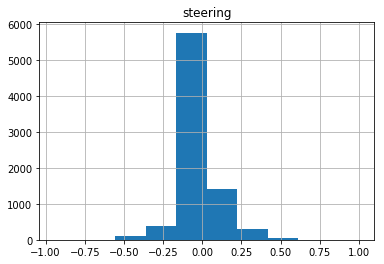

In [15]:
data_frame.hist(column='steering')
plt.show()

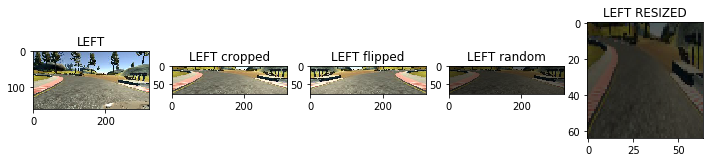

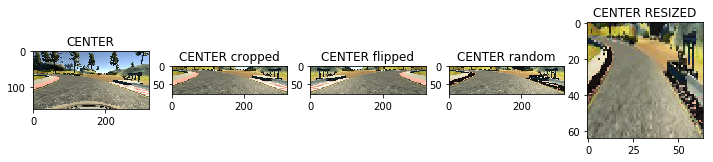

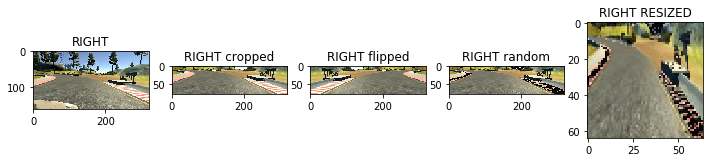

In [31]:
# Image Augmentation
from PIL import Image

# using PIL
'''
left_image = Image.open('data/{}'.format(left[0]))
center_image = Image.open('data/{}'.format(center[0]))
right_image = Image.open('data/{}'.format(right[0]))

def FlipImage(image):
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    return flipped_image
    
def CropImage(image):
    # http://matthiaseisen.com/pp/patterns/p0202/
    width = image.width 
    height = image.height
    # cut out sky, trees , and car
    cropped_image = image.crop((0, int(height/3), 320, height-20)) # (left, upper, right, and lower) 
    return cropped_image

def ResizeImage(image):
    resize_image = image.resize((64,64))
    return resize_image
'''

# using OPENCV
def FlipImage(image):
    return cv2.flip(image, 1)

def CropImage(image):
    return image[53:130, 0:319]

def ResizeImage(image):
    return cv2.resize(image, (64, 64), cv2.INTER_AREA)

def BrightnessImage(image):
    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    # scaling up or down the V channel of HSV
    image[:,:,2] = image[:,:,2] * random_bright
    image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    return image

left_image = cv2.imread('data/{}'.format(left[2]))
left_image = cv2.cvtColor(left_image,cv2.COLOR_BGR2RGB)
center_image = cv2.imread('data/{}'.format(center[2]))
center_image = cv2.cvtColor(center_image,cv2.COLOR_BGR2RGB)
right_image = cv2.imread('data/{}'.format(right[2]))
right_image = cv2.cvtColor(right_image,cv2.COLOR_BGR2RGB)

images = [left_image, center_image, right_image]
image_names = ['LEFT', 'CENTER', 'RIGHT']

i = 1

for image, names in zip(images, image_names):
    fig = plt.figure(figsize=(12, 12))
    cropped_image = CropImage(image)
    flipped_image = FlipImage(cropped_image)
    random_bright_image = BrightnessImage(cropped_image)
    resize_image = ResizeImage(random_bright_image)

    plt.subplot(i, 5, 1)
    plt.imshow(image)
    plt.title('{}'.format(image_names[i-1]))
    plt.subplot(i, 5, 2)
    plt.imshow(cropped_image)
    plt.title('{} cropped'.format(image_names[i-1]))
    plt.subplot(i, 5, 3)
    plt.imshow(flipped_image)
    plt.title('{} flipped'.format(image_names[i-1]))
    plt.subplot(i, 5, 4)
    plt.imshow(random_bright_image)
    plt.title('{} random'.format(image_names[i-1]))
    plt.subplot(i, 5, 5)
    plt.imshow(resize_image)
    plt.title('{} RESIZED'.format(image_names[i-1]))
    plt.show()
    i = i + 1

#print (np.random.uniform())

In [26]:
from sklearn.model_selection import train_test_split
images = data_frame['center']
angles = data_frame['steering']
images_train, images_validation, angles_train, angles_validation = train_test_split(
    images, angles, test_size=0.15, random_state=42)
display(images_train.head())
display(angles_train.head())


1188    IMG/center_2016_12_01_13_34_38_663.jpg
5418    IMG/center_2016_12_01_13_42_16_322.jpg
447     IMG/center_2016_12_01_13_33_23_530.jpg
1417    IMG/center_2016_12_01_13_35_01_853.jpg
2582    IMG/center_2016_12_01_13_36_59_991.jpg
Name: center, dtype: object

1188    0.090465
5418    0.000000
447     0.000000
1417    0.000000
2582    0.000000
Name: steering, dtype: float64

In [30]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(3, 1, 1, input_shape=(64, 64, 3)))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(3, 5, 5, subsample=(2, 2)))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(24, 5, 5, subsample=(2, 2)))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(36, 5, 5, subsample=(2, 2)))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(48, 3, 3))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(64, 3, 3))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Conv2D(128, 3, 3))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(1))
'''
optimizer = Adam(lr=0.001)
model.compile(loss='mse', optimizer=optimizer)
model.summary()
'''

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'Conv2D_13' (op: 'Conv2D') with input shapes: [?,1,1,64], [3,3,64,128].